In [ ]:
# Jesse Hernandez
# Prof. Liu

import numpy as np
import scipy
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split


import seaborn as sn
import pandas as pd
import math
import datetime
import platform


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# All neccessary imports above and loading data below

# These are hyperparameters for CNN model
batch_size = 128
num_classes = 10
epochs = 10

# load (downloaded if needed) the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
cX_train, cX_test, cY_train, cY_test = train_test_split(x_train, y_train, test_size=10000)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# The given function for calculating confusion matrix and metrics

def func_confusion_matrix(y_test, y_pred):
    """ this function is used to calculate the confusion matrix and a set of metrics.
    INPUT:
        y_test, ground-truth lables;
        y_pred, predicted labels;
    OUTPUT:
        CM, confuction matrix
        acc, accuracy
        arrR[], per-class recall rate,
        arrP[], per-class prediction rate.
    """

    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    unique_values = set(y_pred)
    sorted(unique_values)
    num_classes = len(unique_values)
    unique_values = np.array(list(unique_values))  # change to array so can use indexes
    possible_string_dict = {}
    # make sure all values are 0 based, so can use built-in "zip" function
    if issubclass(type(y_test[0]), np.integer):  # if values are integers
        y_test_min = y_test.min()
        if y_test_min != 0:  # if does not contain 0, reduce both test and pred by min value to get 0 based for both
            y_test = y_test - y_test_min
            y_pred = y_pred - y_test_min
    else:
        # assume values are strings, change to integers
        # TODO, change to convert list from string to int
        y_test_int = np.empty(len(y_test), dtype=int)
        y_pred_int = np.empty(len(y_pred), dtype=int)
        for index in range(0, num_classes):
            current_value = unique_values[index]
            possible_string_dict[index] = current_value
            y_test_int[y_test == current_value] = index
            y_pred_int[y_pred == current_value] = index
        y_test = y_test_int
        y_pred = y_pred_int

    ## your code for creating confusion matrix;
    conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int)
    for a, p in zip(y_test, y_pred):
        conf_matrix[a][p] += 1

    ## your code for calcuating acc;
    accuracy = conf_matrix.diagonal().sum() / conf_matrix.sum()

    ## your code for calcualting arrR and arrP;
    recall_array = np.empty(num_classes, dtype=float)
    precision_array = np.empty(num_classes, dtype=float)
    for index in range(0, num_classes):
        value = conf_matrix[index, index]
        recall_sum = conf_matrix[index, :].sum()
        precision_sum = conf_matrix[:, index].sum()
        recall_array[index] = value / recall_sum
        precision_array[index] = value / precision_sum

    return conf_matrix, accuracy, recall_array, precision_array

In [ ]:



# Preparing the data for the model 
cX_train = cX_train.reshape(cX_train.shape[0], 28, 28, 1)
cX_test = cX_test.reshape(cX_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# since this is a convolutional network the pixels stay in their 28x28 format
# but also get an extra dimension to use 3x3 kernal size

cY_train = tf.keras.utils.to_categorical(cY_train, num_classes)
cY_test = tf.keras.utils.to_categorical(cY_test, num_classes)
cX_train = cX_train.astype('float32')
cX_test = cX_test.astype('float32')
cX_train = cX_train / 255
cX_test = cX_test / 255  # data normalization

print(cX_test.shape)
print(cY_test.shape)
print(cX_train.shape)
print(cY_train.shape)
print()

# building model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])
model.summary()
# specifing a softmax output will give one hot encoding that needs to be reverserd
# for the confusion matrix

hist = model.fit(cX_train, cY_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(cX_test, cY_test))
print("The model has successfully trained")


score = model.evaluate(cX_test, cY_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model_name1 = 'digits_recognition_mlpCNN.h5'
model.save(model_name1, save_format='h5')
# saving the current trained model for easier acces later for comparison with other model


(10000, 28, 28, 1)
(10000, 10)
(50000, 28, 28, 1)
(50000, 10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.5518 - accuracy: 0.9176 - val_loss: 0.3580 - val_accuracy: 0.9494
Epoch 2/10
1563/1563 [==============

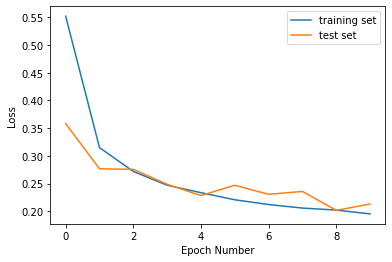

In [ ]:

# made a seperate set from the same 50,000 samples so that any modifcation made wont affect the other model
fX_train, fX_test, fY_train, fY_test = train_test_split(x_train, y_train, test_size=10000)

x_train_normalized = fX_train / 255
x_test_normalized = fX_test / 255


model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))
model.summary()
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

training_history = model.fit(
    x_train_normalized,
    fY_train,
    epochs=10,
    validation_data=(x_test_normalized, fY_test)
)

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()
plt.show()


model_name = 'digits_recognition_mlpFNN.h5'
model.save(model_name, save_format='h5')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


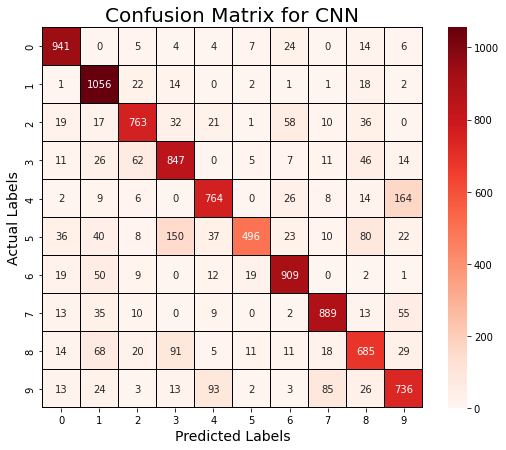

Here is the accuracy for FNN model: 0.8086
The recall and precision rates will be printed in their own pandas DF



,0,1,2,3,4,5,6,7,8,9
0,0.880262,0.796981,0.840308,0.735882,0.808466,0.913444,0.854323,0.861434,0.733405,0.715258


,0,1,2,3,4,5,6,7,8,9
0,0.936318,0.945389,0.797283,0.823129,0.769386,0.549889,0.890304,0.866472,0.719538,0.737475


In [ ]:
# load the saved model to make preditions over the testing set
loaded_model = tf.keras.models.load_model(model_name1)
predictions_one_hot = loaded_model.predict([cX_test])
predictions = np.argmax(predictions_one_hot, axis=1)
cY_eval = np.argmax(cY_test, axis=1)
# one hot encoding is not good for a confusion matrix

cm, CNN_Accuracy, CNN_recall, CNN_precision = func_confusion_matrix(cY_eval, predictions)

# Confusion matrix plotting
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    cm,
    linecolor='Black',
    cmap='Reds',
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.title('Confusion Matrix for CNN', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

print(f"Here is the accuracy for FNN model: {CNN_Accuracy}")
print("The recall and precision rates will be printed in their own pandas DF")
print()

# matrix metrics 
with pd.option_context('display.float_format', '{:,.3f}'.format):
    display(pd.DataFrame(CNN_precision).T.style.set_caption("Per-class precision for CNN"))
    print()
    display(pd.DataFrame(CNN_recall).T.style.set_caption("Per-class recall rates "))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


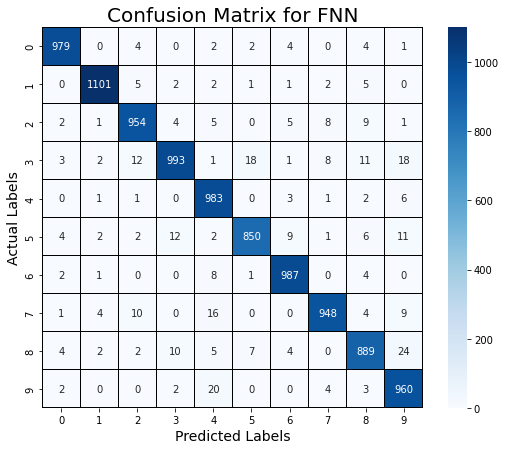

Here is the accuracy for FNN model: 0.9644
The recall and precision rates will be printed in their own pandas DF



,0,1,2,3,4,5,6,7,8,9
0,0.981946,0.988330,0.963636,0.970674,0.941571,0.967008,0.973373,0.975309,0.948773,0.932039


,0,1,2,3,4,5,6,7,8,9
0,0.982932,0.983914,0.964611,0.930647,0.985958,0.945495,0.984048,0.955645,0.938754,0.968718


In [ ]:
loaded_model = tf.keras.models.load_model(model_name)
predictions_one_hot = loaded_model.predict([x_test_normalized])

# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)
cm, FNN_Accuracy, FNN_recall, FNN_precision = func_confusion_matrix(fY_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    cm,
    linecolor='Black',
    cmap='Blues',
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.title('Confusion Matrix for FNN', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(f"Here is the accuracy for FNN model: {FNN_Accuracy}")
print("The recall and precision rates will be printed in their own pandas DF")
print()


with pd.option_context('display.float_format', '{:,.3f}'.format):
    display(pd.DataFrame(FNN_precision).T.style.set_caption("Per-class precision for FNN"))
    print()
    display(pd.DataFrame(FNN_recall).T.style.set_caption("Per-class recall rates "))





## Now that all of the training and testing is done...
## Which model has better accuracy?

In [ ]:
if CNN_Accuracy > FNN_Accuracy:
  bestModel = model_name1
else:
  bestModel = model_name

print(f"The winner is {bestModel}")

The winner is digits_recognition_mlpFNN.h5


## Now to Use the better model for validation on the last 10,000 samples

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


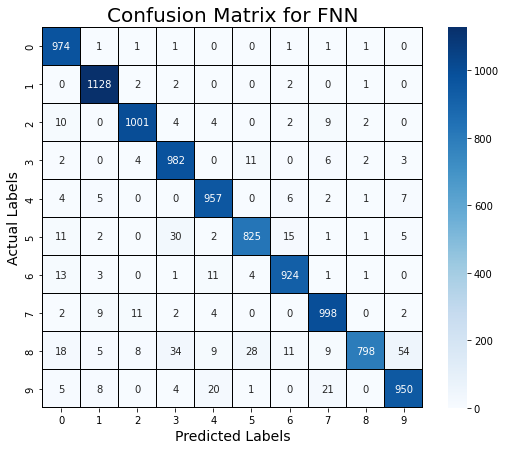

Here is the accuracy for FNN model: 0.9537
The recall and precision rates will be printed in their own pandas DF



,0,1,2,3,4,5,6,7,8,9
0,0.937440,0.971576,0.974684,0.926415,0.950348,0.949367,0.961498,0.952290,0.988848,0.930460


,0,1,2,3,4,5,6,7,8,9
0,0.993878,0.993833,0.969961,0.972277,0.974542,0.924888,0.964509,0.970817,0.819302,0.941526


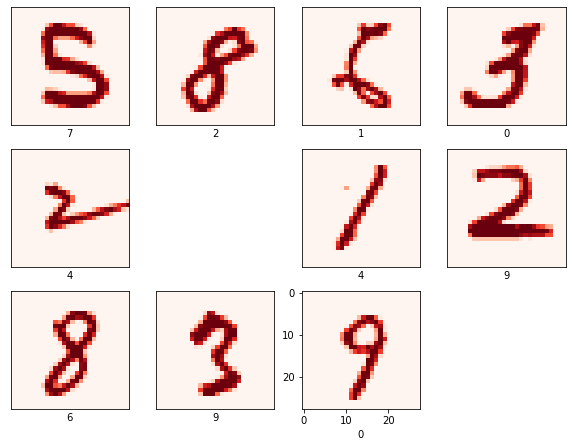

In [ ]:

# best model is always going the be the model with better accuracy
loaded_model = tf.keras.models.load_model(bestModel)
predictions_one_hot = loaded_model.predict([x_test])

# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

cm, FNN_Accuracy, FNN_recall, FNN_precision = func_confusion_matrix(y_test, predictions)
# confusion matix again
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    cm,
    linecolor='Black',
    cmap='Blues',
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.title('Confusion Matrix for FNN', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

print(f"Here is the accuracy for FNN model: {FNN_Accuracy}")
print("The recall and precision rates will be printed in their own pandas DF")
print()


with pd.option_context('display.float_format', '{:,.3f}'.format):
    display(pd.DataFrame(FNN_precision).T.style.set_caption("Per-class precision for FNN"))
    print()
    display(pd.DataFrame(FNN_recall).T.style.set_caption("Per-class recall rates "))




# here the list is going to be index values of incorrectly predicted samples
# to display
numbers_to_display = []

plt.figure(figsize=(10, 10))

for i, prediction in enumerate(predictions):
    if prediction != fY_test[i]:
        numbers_to_display.append(i)
    if len(numbers_to_display) >9:
      break

# this loop only runs to collect the first 10 incorrect samples 
num_cells = math.ceil(math.sqrt(len(numbers_to_display)))


for i, plot_index in enumerate(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == fY_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)


plt.show()